In [1]:
from pyCATHY import cathy_tools
from pyCATHY.plotters import cathy_plots as cplt
import pyvista as pv
import numpy as np

In [2]:
path2prj = "."  # add your local path here
simu = cathy_tools.CATHY(
                        dirName=path2prj, 
                        prj_name="my_first_project"
                       )

🏁 Initiate CATHY object

## Change the preprocessing inputs (mesh size, ... vegetation map)

🔄 Update hap.in file

🔄 update dem_parameters file 

🔄 update dem_parameters file 

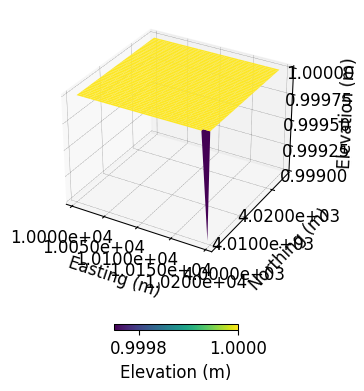

In [3]:
# simu.DEM
simu.show_input('dem')

In [4]:
my_new_DEM = np.ones([50,20])
my_new_DEM[-1,-1] = 1-1e-3

🔄 Update hap.in file

🔄 update dem_parameters file 

🔄 Update dtm_13 file

─────────────────────────────────────────── ⚠ warning messages above ⚠ ────────────────────────────────────────────

                            The parm dictionnary is empty
                            Falling back to defaults to update CATHYH
                            This can have consequences !!
                            

───────────────────────────────────────────────────────────────────────────────────────────────────────────────────

🔄 update parm file 

🔄 update dem_parameters file 

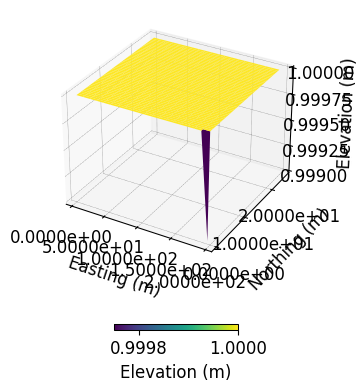

In [5]:
simu.update_prepo_inputs(my_new_DEM,
                         delta_x=10,
                         xllcorner=0,
                         yllcorner=0,
                        )
simu.show_input('dem')

In [6]:
simu.create_mesh_vtk()

🍳 gfortran compilation

👟 Run preprocessor

🔄 update parm file 

🛠  Recompile src files [3s]

🍳 gfortran compilation [7s]

b''

👟 Run processor

In [7]:
#simu.update_prepo_inputs?
simu.update_prepo_inputs(
                        DEM=my_new_DEM,
                        xllcorner=1e4,
                        yllcorner=4e3,
                        )

🔄 Update hap.in file

🔄 update dem_parameters file 

🔄 Update dtm_13 file

🔄 update dem_parameters file 

In [8]:
DEM, DEM_header = simu.read_inputs('dem')
print(DEM_header)

{'north': '0', 'south': '0.00000000', 'east': '0', 'west': '0.00000000', 'rows': '50', 'cols': '20'}


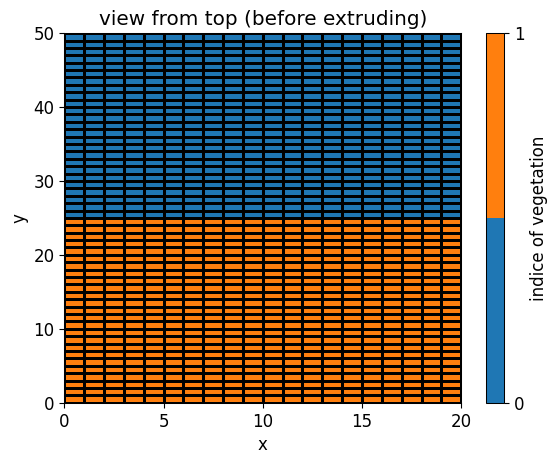

In [9]:
root_map, root_map_header = simu.read_inputs('root_map')
#root_map
simu.show_input('root_map')
#root_map_header

In [10]:
#simu.update_veg_map?
root_map_new = root_map
root_map_new[0:int(len(root_map_new)/2),:]=2
simu.update_veg_map(root_map_new)

array([[2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2.],
       [2., 2., 2., 2., 2., 2.

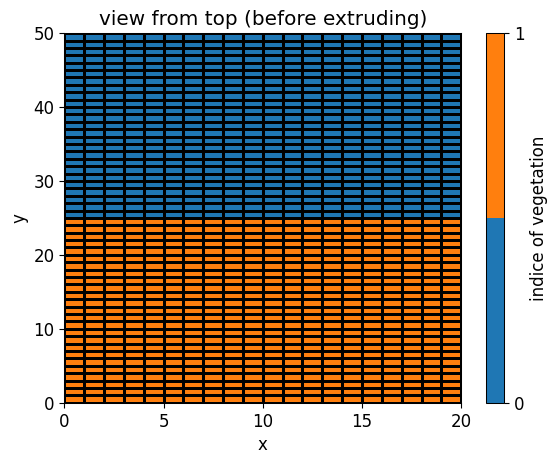

In [11]:
simu.show_input('root_map')

Within the soil file we describe soil physical properties and root properties

In [12]:
simu

In [13]:
SPP, FP = simu.read_inputs('soil')

In [14]:
# Copying the first row
new_row = FP.iloc[0].copy()
# Appending the copied row to the DataFrame
FP.loc[len(FP)] = new_row

In [15]:
#FP['ZROOT'].iloc[1] = 0.5
#FP

In [16]:
FP_map = FP.to_dict(orient='list')
FP_map

{'PCANA': [0.0, 0.0, 0.0],
 'PCREF': [-4.0, -4.0, -4.0],
 'PCWLT': [-150.0, -150.0, -150.0],
 'ZROOT': [1.0, 0.5, 1.0],
 'PZ': [1.0, 1.0, 1.0],
 'OMGC': [1.0, 1.0, 1.0]}

simu.update_cathyH(
                    MAXVEG=2,
                  )

simu.update_soil(
                    SPP=SPP,
                    FP_map=FP_map,
                    #MAXVEG=2,
                )

In [17]:
#simu.update_veg_map(show=True)

simu.show_input('soil')

In [18]:
simu.run_preprocessor(verbose=False)

🍳 gfortran compilation

👟 Run preprocessor

In [19]:
simu.create_mesh_vtk()

🍳 gfortran compilation

👟 Run preprocessor

🔄 update parm file 

🛠  Recompile src files [15s]

🍳 gfortran compilation [19s]

b''

👟 Run processor

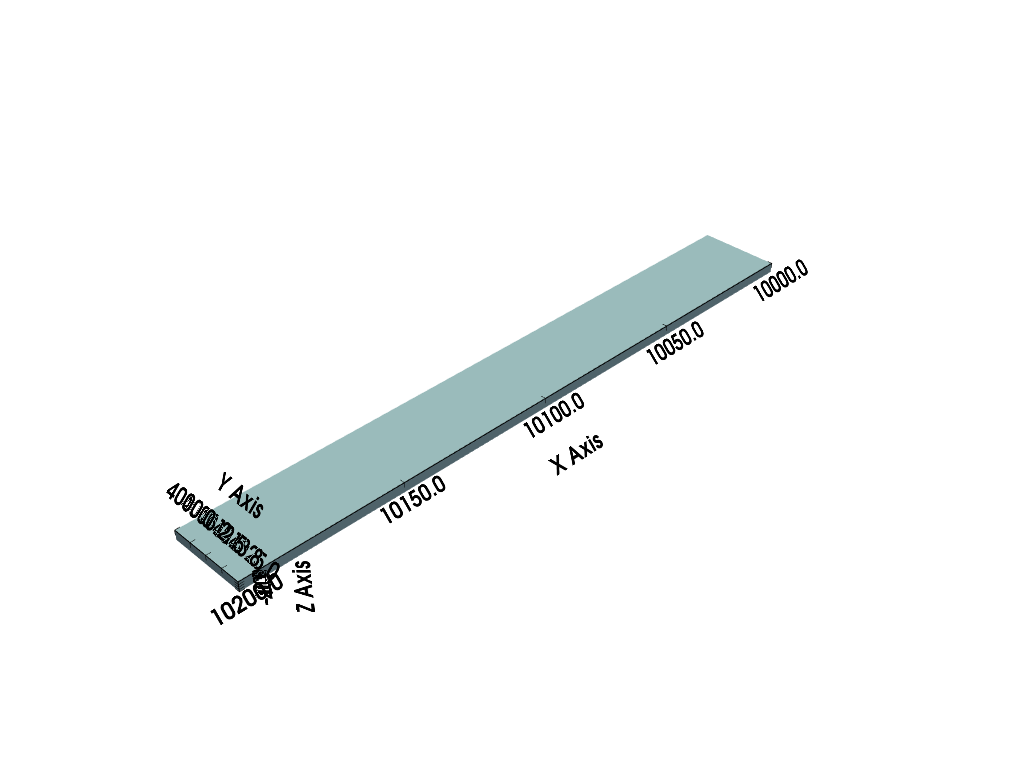

In [20]:
pl = pv.Plotter(notebook=True)
mymesh = pv.read('./my_first_project/vtk/my_first_project.vtk')
pl.add_mesh(mymesh)
pl.show_bounds()
pl.show()

In [21]:
#simu.update_sfbc()
#simu.update_atmbc?

In [22]:
simu.update_ic?

Signature: simu.update_ic(INDP=2, IPOND=0, WTPOSITION=0, verbose=False, **kwargs)
Docstring:
The initial conditions file contains the pressure heads distribution for the study area (INDP)
For example, to simulate a uniform water table depth or 0.5 m or 1.0 m from the ground surface,
INDP=3 and WTHEIGHT=4.5 are selected


Parameters
----------
INDP : int, optional
    Flag for pressure head initial conditions (all nodes). The default is 2.

    - =0 for input of uniform initial conditions (one value read in)
    - =1 for input of non-uniform IC's (one value read in for each node)
    - =2 for calculation of fully saturated vertical hydrostatic equilibrium IC's
      (calculated in subroutine ICVHE). In the case of IPOND>0, the fully saturated
      hydrostatic IC is calculated (in subroutine ICVHEPOND) starting from the ponding head
      values at the surface nodes, rather than surface pressure heads of 0.
    - =3 for calculation of partially saturated vertical hydrostatic equilibrium

In [23]:
#simu.update_ic(INDP=0, pressure_head_ini=-5) # pressure head in meter

In [24]:
simu.update_ic(INDP=3, WTHEIGHT=1) # pressure head in meter

🔄 Update ic

In [25]:
df_atmbc = simu.read_inputs('atmbc')
df_atmbc.time

0        0.0
1    86400.0
Name: time, dtype: float64

In [26]:
simu.update_atmbc(HSPATM=1,IETO=0,
                  time=list(df_atmbc.time),
                  #VALUE = [Precipitation,ET]
                  netValue = [1e-7,5e-7] # m/s
                 )
simu.atmbc


🔄 Update atmbc

🔄 update parm file 

{'HSPATM': 1, 'IETO': 0, 'time': [0.0, 86400.0], 'VALUE': [1e-07, 5e-07]}

In [39]:
#simu.parm
simu.update_atmbc?

Signature:
simu.update_atmbc(
    HSPATM=1,
    IETO=0,
    time=None,
    VALUE=[None, None],
    netValue=[],
    show=False,
    verbose=False,
    **kwargs,
)
Docstring:
Atmospheric forcing term (atmbc - IIN6)

..note:


        1 1                HSPATM,IETO
        0.0000000e+00      time
        5.5e-06              VALUE
        12.000000e+03      time
        0.00                 VALUE
        18.000000e+03      time
        0.00                 VALUE

        The values are those of a 200-min rainfall event at a uniform
        intensity of 3.3·10-4 m/min, followed by 100 min of drainage.

..note:

        In case of simultaneous precipitation and evaporation, we impose at
        the surface the net flux, i.e., precipitation minus evaporation.





Parameters
----------
HSPATM : int, optional
    - =0 for spatially variable atmospheric boundary condition inputs;
    blank or =9999 if unit IIN6 input is to be ignored; otherwise atmospheric BC's are
    homogeneous in space.
I

In [28]:
86400.0/(60*60*24)

1.0

In [29]:
simu.parm['DTMIN'] = 1e-2 #s 
simu.parm['DELTAT'] = 1
#simu.parm['DELTAT'] = 1
simu.run_processor?

Signature:
simu.run_processor(
    recompile=True,
    runProcess=True,
    verbose=False,
    **kwargs,
)
Docstring:
Run cathy.exe

1. updates cathy parameters and cathyH based on **kwargs
2. recompile the source files (set False for notebook) and create the executable
3. run the processor using bash cmd if runProcess is True

Parameters
----------
recompile : Bool, optional
    recomplile CATHY src files. The default is True.
runProcess : Bool, optional
    exectute compile CATHY exe. The default is True.
verbose : Bool, optional
    Output CATHY log. The default is False.
File:      ~/Nextcloud/BenCSIC/Codes/BenjMy/pycathy_wrapper/pyCATHY/cathy_tools.py
Type:      method

In [32]:
simu.update_parm(TIMPRTi=[1800,7200])

🔄 update parm file 

In [33]:
simu.run_processor(IPRT1=2, 
                    DTMIN=1e-2,
                    DTMAX=1e2,
                    DELTAT=5,
                    TRAFLAG=0,
                    verbose=False
                   )


🔄 update parm file 

🛠  Recompile src files [143s]

🍳 gfortran compilation [147s]

b''

👟 Run processor

plot pressure


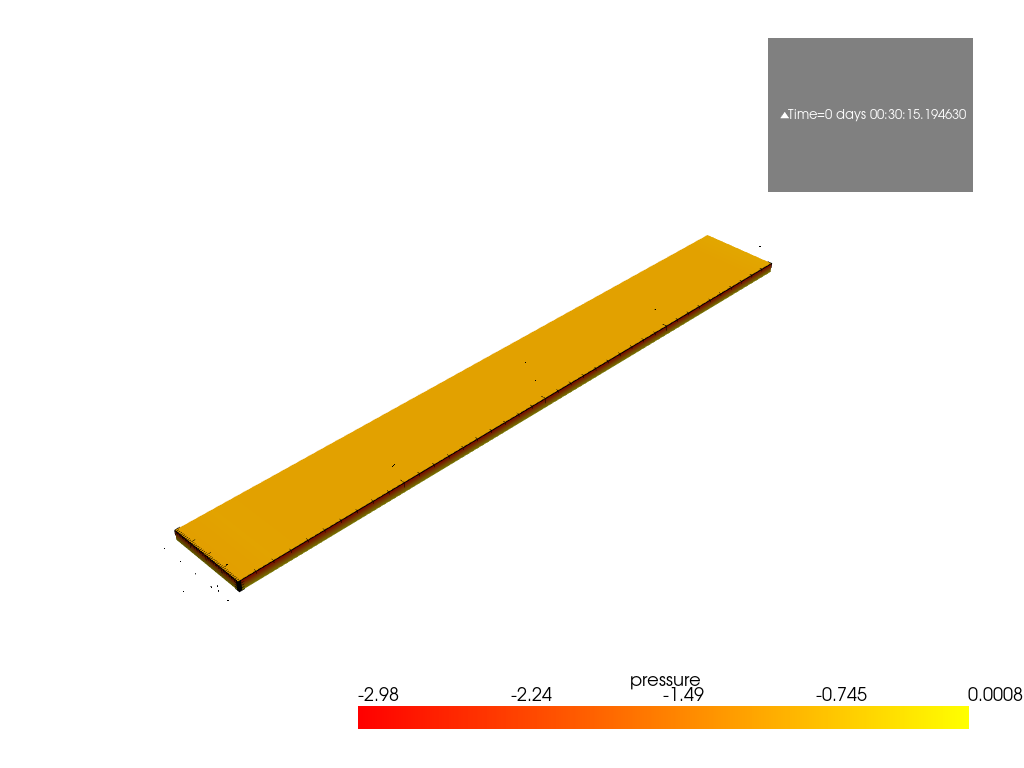

In [35]:
pl = pv.Plotter(notebook=True)
cplt.show_vtk(unit="pressure", 
              timeStep=1, 
              path=simu.workdir + "/my_first_project/vtk/",
              ax=pl,
              )
pl.show()


In [37]:
#pl = pv.Plotter(notebook=True)
#plt.show_vtk_TL()

